In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_set = pd.read_csv("../input/titanic/train.csv")
test_set=pd.read_csv("../input/titanic/test.csv")

## **Basic Exploratory Data Analysis**

In [3]:
# First 5 lines of the training set.
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# To know the data types involved in the training set.
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As seen above, some of the `int64` columns have ordinal variables, which should be confused as normal numbers.

In [5]:
# To know whether there are Null values in the training set.
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Some simple stats on the really numerical data.
train_set[['Age','Fare','Parch','SibSp']].describe()

,Age,Fare,Parch,SibSp
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,0.523008
std,14.526497,49.693429,0.806057,1.102743
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,0.000000,1.000000
max,80.000000,512.329200,6.000000,8.000000


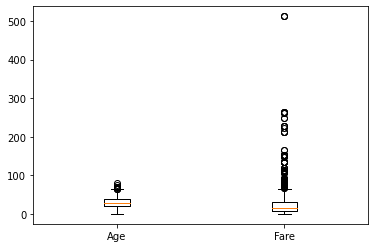

In [7]:
import matplotlib.pyplot as plt

plt.boxplot([train_set['Age'][train_set['Age'].notnull()].values, train_set['Fare'].values])
plt.xticks([1,2],['Age','Fare'])
plt.show()

#fig, ax = plt.subplots()
#ax.boxplot(columns)
#plt.show()

- The average `Age` is 29 while the average `Fare` is at 32 dollars.
- A big chunk of `Age` is up to 38 years old, while a big chunk of the data found in `Fare` is up to 31 dollars (somewhat cheap of a Titanic).
- The minimum `Age` is 0.43 (??), while the minimum `Fare` is 0 dollars (FREE!!).

In [8]:
# To count the values in ordinal columns.
for col in ('Survived','Pclass','Sex','SibSp','Parch'):
    print(train_set[col].value_counts())
    print('*'*20)

0    549
1    342
Name: Survived, dtype: int64
********************
3    491
1    216
2    184
Name: Pclass, dtype: int64
********************
male      577
female    314
Name: Sex, dtype: int64
********************
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
********************
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
********************


In [9]:
train_cp = train_set.copy()
test_cp = test_set.copy()

for dataset in (train_cp,test_cp):

    dataset.loc[:,'Age_Group'] = np.nan
    dataset.loc[:,'Age_Group'][dataset['Age']<10] = 0
    dataset.loc[:,'Age_Group'][(dataset['Age']>=10) & (dataset['Age']<20)] = 1
    dataset.loc[:,'Age_Group'][(dataset['Age']>=20) & (dataset['Age']<30)] = 2
    dataset.loc[:,'Age_Group'][(dataset['Age']>=30) & (dataset['Age']<40)] = 3
    dataset.loc[:,'Age_Group'][(dataset['Age']>=40) & (dataset['Age']<50)] = 4
    dataset.loc[:,'Age_Group'][(dataset['Age']>=50) & (dataset['Age']<60)] = 5
    dataset.loc[:,'Age_Group'][(dataset['Age']>=60) & (dataset['Age']<70)] = 6
    dataset.loc[:,'Age_Group'][(dataset['Age']>=70) & (dataset['Age']<80)] = 7
    dataset.loc[:,'Age_Group'][(dataset['Age']>=80) & (dataset['Age']<90)] = 8

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: Setti

In [10]:
for dataset in (train_cp,test_cp):
    dataset.loc[:,'Fare_Group'] = np.nan
    dataset.loc[:,'Fare_Group'][dataset['Fare']<100] = 0
    dataset.loc[:,'Fare_Group'][(dataset['Fare']>=100) & (dataset['Fare']<200)] = 1
    dataset.loc[:,'Fare_Group'][(dataset['Fare']>=200) & (dataset['Fare']<300)] = 2
    dataset.loc[:,'Fare_Group'][(dataset['Fare']>=300) & (dataset['Fare']<400)] = 3
    dataset.loc[:,'Fare_Group'][(dataset['Fare']>=400) & (dataset['Fare']<500)] = 4
    dataset.loc[:,'Fare_Group'][(dataset['Fare']>=500) & (dataset['Fare']<600)] = 5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [11]:
train_cp = train_cp.drop(columns=['Age','Fare','PassengerId','Cabin','Name','Ticket'])
test_cp = test_cp.drop(columns=['Age','Fare','PassengerId','Cabin','Name','Ticket'])

In [12]:
train_cp['Sex'] = train_cp['Sex'].map({'female':0, 'male':1}, na_action='ignore')
test_cp['Sex'] = test_cp['Sex'].map({'female':0, 'male':1}, na_action='ignore')

train_cp['Embarked'] = train_cp['Embarked'].map({'C':0, 'Q':1, 'S':2}, na_action='ignore')
test_cp['Embarked'] = test_cp['Embarked'].map({'C':0, 'Q':1, 'S':2}, na_action='ignore')

In [13]:
train_cp['Age_Group'][train_cp['Age_Group'].isnull()] = train_cp['Age_Group'].mode()[0]
train_cp['Embarked'][train_cp['Embarked'].isnull()] = train_cp['Embarked'].mode()[0]

test_cp['Age_Group'][test_cp['Age_Group'].isnull()] = test_cp['Age_Group'].mode()[0]
test_cp['Fare_Group'][test_cp['Fare_Group'].isnull()] = test_cp['Fare_Group'].mode()[0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3

In [14]:
train_cp.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group,Fare_Group
0,0,3,1,1,0,2.0,2.0,0.0
1,1,1,0,1,0,0.0,3.0,0.0
2,1,3,0,0,0,2.0,2.0,0.0
3,1,1,0,1,0,2.0,3.0,0.0
4,0,3,1,0,0,2.0,3.0,0.0


In [15]:
for col in train_cp:
    print(pd.crosstab(index=train_cp[col],columns=train_cp['Survived']))
    print('*'*20)

Survived    0    1
Survived          
0         549    0
1           0  342
********************
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
********************
Survived    0    1
Sex               
0          81  233
1         468  109
********************
Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0
********************
Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0
********************
Survived    0    1
Embarked          
0.0        75   93
1.0        47   30
2.0       427  219
********************
Survived     0    1
Age_Group          
0.0         24   38
1.0         61   41
2.0        268  129
3.0         94   73
4.0         55   34
5.0         28   20
6.0         13    6
7.0       

Some insights here:
- There are more 1st class people who survived compared to other classes.
- More females survived the disaster compared to males.
- Infants survived more than other age groups.
- The first fare group (which is the biggest group) did not survive as well as other fair groups.

## **Advanced Exploratory Data Analysis**

In [16]:
# A correlation matrix where only the 'Survived' column is seen.
train_cp.corr()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group,Fare_Group
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,-0.167675,-0.050972,0.162016
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,0.162098,-0.339610,-0.331479
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,0.108262,0.074794,-0.108615
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.068230,-0.226973,0.016660
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.039798,-0.158376,0.127231
Embarked,-0.167675,0.162098,0.108262,0.068230,0.039798,1.000000,-0.007513,-0.202275
Age_Group,-0.050972,-0.339610,0.074794,-0.226973,-0.158376,-0.007513,1.000000,0.040918
Fare_Group,0.162016,-0.331479,-0.108615,0.016660,0.127231,-0.202275,0.040918,1.000000


It seems there are two features that affect the `Survived` column the most: `Pclass` (on the higher the class, the lower the chance of surviving), and `Fare` (the higher the ticket cost, the higher the chance of surviving).

On a side note, `Fare` is very much inversely correlated with `Pclass`.


In [17]:
# To see the dependency of 'Survived' with respects to 'Age_Group','Age','Fare_Group','Fare','Parch','SibSp','Sex', and 'Embarked'.
from scipy.stats import chi2_contingency

for col in train_cp:
    age_xtab = pd.crosstab(train_cp['Survived'], train_cp[col], normalize='columns')
    chi2, p, dof, ex = chi2_contingency(age_xtab, correction=False)
    print(f"{col}'s p-value accounting for 'Survived' is : ", p)
    if p < 0.05:
        print("The Null hypothesis is matched, thus both covariates are independent from each other.")
    else:
        print("Both covariates depend on each other.")
    print('*'*20)

Survived's p-value accounting for 'Survived' is :  0.15729920705028105
Both covariates depend on each other.
********************
Pclass's p-value accounting for 'Survived' is :  0.8577638006771973
Both covariates depend on each other.
********************
Sex's p-value accounting for 'Survived' is :  0.4329721811592637
Both covariates depend on each other.
********************
SibSp's p-value accounting for 'Survived' is :  0.9642394272187368
Both covariates depend on each other.
********************
Parch's p-value accounting for 'Survived' is :  0.9386032110375151
Both covariates depend on each other.
********************
Embarked's p-value accounting for 'Survived' is :  0.9498945976634137
Both covariates depend on each other.
********************
Age_Group's p-value accounting for 'Survived' is :  0.9693954162129654
Both covariates depend on each other.
********************
Fare_Group's p-value accounting for 'Survived' is :  0.8045915153299935
Both covariates depend on each other

In [18]:
# To see whether there is a big imbalance in the features.

for col in list(train_cp.columns):
    if col not in  ('Survived',):
        treat_sr = train_cp[col][train_cp['Survived']==1]
        control_sr = train_cp[col][train_cp['Survived']==0]
        print(f'{col.upper()}: ', np.abs((treat_sr.mean() - control_sr.mean()))/np.sqrt((treat_sr.var()+control_sr.var())*0.5))

PCLASS:  0.7250755785975832
SEX:  1.2873976164284024
SIBSP:  0.07698862396993371
PARCH:  0.16948207380568334
EMBARKED:  0.34052693059321115
AGE_GROUP:  0.10405526011605862
FARE_GROUP:  0.30661676549755645


In [19]:
# To see which variables a more significant to 'Survived' changed.

import statsmodels.api as sm
import statsmodels.formula.api as smf

y = train_cp['Survived']
X = train_cp.drop(columns='Survived')
#X = train_dummies[['Fare','Sex_male','SibSp']][train_dummies['Age'].notnull()]
logit_model = sm.Logit(y, X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.523160
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:                  0.2144
Time:                        20:23:48   Log-Likelihood:                -466.14
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.740e-52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.0424      0.072     -0.586      0.558      -0.184       0.099
Sex           -2.1387      0.174    -12.313      0.000      -2.479      -1.798
SibSp         -0.1251      0.085     -1.463      0.143      -0.293       0.042
Parch          0.0490      0.108      0.454      0.650      -0.163       0.261
Embarked       0.1731      0.102      1.700      0.089      -0.026       0.373
Age_Group      0.1810      0.050      3.593      0.000       0.082       0.280
Fare_Group     0.8662      0.245      3.541      0.000       0.387       1.346
==============================================================================
"""

In [20]:
train_cp.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_Group',
       'Fare_Group'],
      dtype='object')

In [21]:
# X-validation using MinMaxScaler and LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score,plot_precision_recall_curve, plot_roc_curve


cv = StratifiedKFold(n_splits=50, shuffle=True)

preprocessor = make_column_transformer(
    (MinMaxScaler(), train_cp.drop(columns='Survived').columns)
)

class model_analysis:
    
    def __init__(self, X, y, predmod, test_cp):
        self.X = X
        self.y = y
        self.Xtrain, self.Xtest, self.ytrain, self.ytest = tts(self.X, self.y, random_state=77)
        self.predmod = predmod
        self.cv = StratifiedKFold(n_splits=50, shuffle=True)
        self.model = Pipeline([('prepro',preprocessor),('predmod', self.predmod)])
        self.model.fit(self.Xtrain, self.ytrain)
        self.pred = self.model.predict(test_cp)
    
    
    def mean_std(self):

        result = cross_validate(self.model, self.Xtrain, self.ytrain, cv=self.cv)
        
        mean = result['test_score'].mean()
        std = result['test_score'].std()
        
        return mean, std
    
    def conf_matrix(self):

        return plot_confusion_matrix(self.model, self.Xtest, self.ytest)
    
    def precision_recall(self):
        
        yval = self.model.predict(self.Xtest)

        precision = precision_score(self.ytest, yval)
        recall = recall_score(self.ytest, yval)
        
        disp = plot_precision_recall_curve(
        self.model, self.Xtest, self.ytest, marker="+"
        )
        
        return precision, recall, disp.ax_.set_title("Precision-recall curve")
    
    def roc_auc(self):
        
        disp = plot_roc_curve(self.model, self.Xtest, self.ytest, marker="+")
        
        return disp
    
    def output_file(self, test_set):
        
        res_df = pd.DataFrame({'PassengerId': test_set['PassengerId'], 'Survived': self.pred})

        res_df.to_csv('titanic_submission.csv', index=False)
        

In [22]:
model_analysis(X, y, LogisticRegression(), test_cp).mean_std()

(0.7915384615384614, 0.10033400325248887)

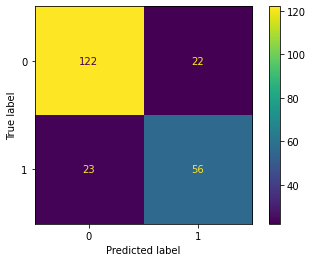

In [23]:
model_analysis(X, y, LogisticRegression(), test_cp).conf_matrix()

(0.717948717948718,
 0.7088607594936709,
 Text(0.5, 1.0, 'Precision-recall curve'))

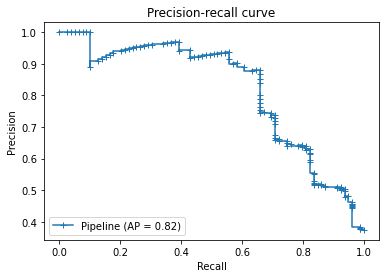

In [24]:
model_analysis(X, y, LogisticRegression(), test_cp).precision_recall()

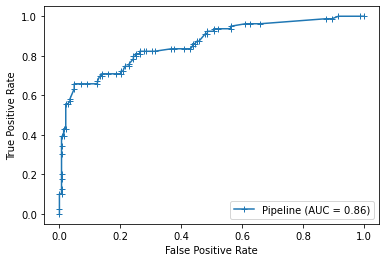

In [25]:
model_analysis(X, y, LogisticRegression(), test_cp).roc_auc()

In [26]:
model_analysis(X, y, LogisticRegression(), test_cp).output_file(test_set)


In [27]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.0


In [28]:
train_cp.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group,Fare_Group
0,0,3,1,1,0,2.0,2.0,0.0
1,1,1,0,1,0,0.0,3.0,0.0
2,1,3,0,0,0,2.0,2.0,0.0
3,1,1,0,1,0,2.0,3.0,0.0
4,0,3,1,0,0,2.0,3.0,0.0


In [29]:
val_dataframe = train_cp.sample(frac=0.1, random_state=1337)
train_dataframe = train_cp.drop(val_dataframe.index)

In [30]:
xtrain = train_dataframe.drop(columns='Survived')
ytrain = train_dataframe['Survived']

xval = val_dataframe.drop(columns='Survived')
yval = val_dataframe['Survived']

In [31]:
from keras.utils import to_categorical

xtrain = np.array(xtrain).astype('float32')
xval = np.array(xval).astype('float32')

ytrain = np.array(ytrain).astype('float32')
yval = np.array(yval).astype('float32')



In [32]:
from keras import regularizers

modkr = keras.models.Sequential()
modkr.add(keras.layers.Dense(7, activation='relu', kernel_regularizer=regularizers.L2(0.01), input_shape=[7]))
modkr.add(keras.layers.Dense(10, kernel_regularizer=regularizers.L2(0.01), activation="relu"))
modkr.add(keras.layers.Dense(1,activation="sigmoid"))

In [33]:
modkr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [34]:
modkr.layers

In [35]:
weights, biases = modkr.layers[2].get_weights()
weights

array([[-0.2680594 ],
       [ 0.27329952],
       [-0.7204181 ],
       [-0.48246923],
       [-0.62707114],
       [ 0.33060855],
       [ 0.14270025],
       [ 0.05226165],
       [ 0.6246236 ],
       [ 0.60504454]], dtype=float32)

In [36]:
biases

array([0.], dtype=float32)

In [37]:
modkr.compile(loss="binary_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [38]:
history = modkr.fit(
    xtrain,
    ytrain,
    epochs=500,
    batch_size=512,
    validation_data=(xval, yval)
);

Epoch 1/500
2/2 [==============================] - 0s 91ms/step - loss: 0.9210 - accuracy: 0.3703 - val_loss: 0.9047 - val_accuracy: 0.3258
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 0.8960 - accuracy: 0.3491 - val_loss: 0.8854 - val_accuracy: 0.3146
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 0.8804 - accuracy: 0.3466 - val_loss: 0.8719 - val_accuracy: 0.3258
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 0.8694 - accuracy: 0.3554 - val_loss: 0.8612 - val_accuracy: 0.3820
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 0.8601 - accuracy: 0.3990 - val_loss: 0.8514 - val_accuracy: 0.4607
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 0.8521 - accuracy: 0.5337 - val_loss: 0.8435 - val_accuracy: 0.5506
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 0.8452 - accuracy: 0.5611 - val_loss: 0.8357 - val_accuracy: 0.6180
Epoch 8/500
2/2 [===

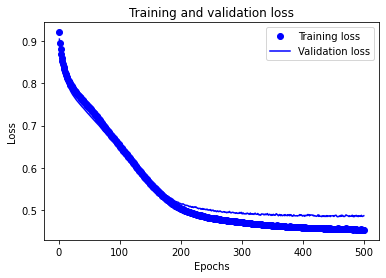

In [39]:
# Evaluation of the loss.
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

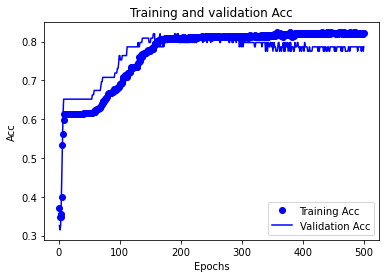

In [40]:
# Evaluation of the accuracy.
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [41]:
history = modkr.fit(
    xtrain,
    ytrain,
    epochs=1800,
    batch_size=512,
    validation_data=(xval, yval)
);

Epoch 1/1800
2/2 [==============================] - 0s 22ms/step - loss: 0.4536 - accuracy: 0.8204 - val_loss: 0.4845 - val_accuracy: 0.7865
Epoch 2/1800
2/2 [==============================] - 0s 10ms/step - loss: 0.4546 - accuracy: 0.8254 - val_loss: 0.4839 - val_accuracy: 0.7865
Epoch 3/1800
2/2 [==============================] - 0s 9ms/step - loss: 0.4535 - accuracy: 0.8242 - val_loss: 0.4858 - val_accuracy: 0.7865
Epoch 4/1800
2/2 [==============================] - 0s 10ms/step - loss: 0.4532 - accuracy: 0.8217 - val_loss: 0.4849 - val_accuracy: 0.7865
Epoch 5/1800
2/2 [==============================] - 0s 9ms/step - loss: 0.4532 - accuracy: 0.8192 - val_loss: 0.4849 - val_accuracy: 0.7865
Epoch 6/1800
2/2 [==============================] - 0s 10ms/step - loss: 0.4530 - accuracy: 0.8204 - val_loss: 0.4865 - val_accuracy: 0.7865
Epoch 7/1800
2/2 [==============================] - 0s 10ms/step - loss: 0.4532 - accuracy: 0.8192 - val_loss: 0.4864 - val_accuracy: 0.7753
Epoch 8/1800
2/

In [42]:
modkr.evaluate(xval, yval)

3/3 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8090


[0.4654002785682678, 0.8089887499809265]

In [43]:
res_df = pd.DataFrame({'PassengerId': test_set['PassengerId'], 'Survived': np.round_(modkr.predict(test_cp)).flatten().astype(int)})

res_df.to_csv('titanic_submission.csv', index=False)